# Exercise 1: Data Preparation

In this exercise, we will perform data preparation tasks on the Breast Cancer Wisconsin (Diagnostic) dataset. The tasks include loading the dataset, handling missing values, exploring feature distributions, and examining correlations with the target variable.

## 1. Import Required Libraries

Import the necessary Python libraries for data manipulation and analysis.

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use("default")             # keep things clean
sns.set_theme(style="whitegrid")     # Seaborn theme
sns.set_palette("Set2")              # Seaborn palette

## 2. Data Loading

Load your dataset and perform initial exploration.

In [29]:
import sklearn.datasets

data = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)

df = pd.concat(data, axis=1)
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Save the DataFrame to a pickle file under ../data directory
df.to_pickle('../data/breast_cancer_data.pkl')

## 3. Exploratory Data Analysis (EDA)

Perform exploratory data analysis to understand the dataset structure and characteristics.

In [30]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [31]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


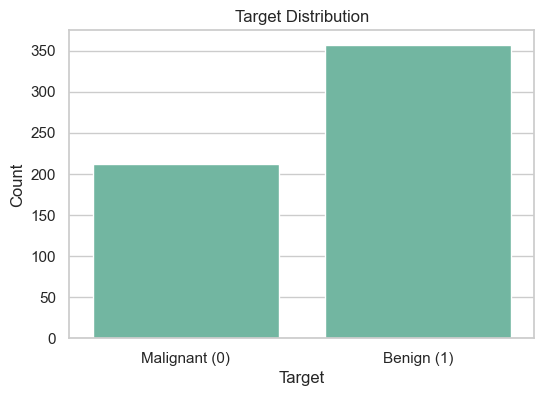

In [32]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=df)
plt.title("Target Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks([0, 1], ["Malignant (0)", "Benign (1)"])
plt.show()

### Correlation with Target Variable

Now, we will display the correlation of each feature with the target variable.

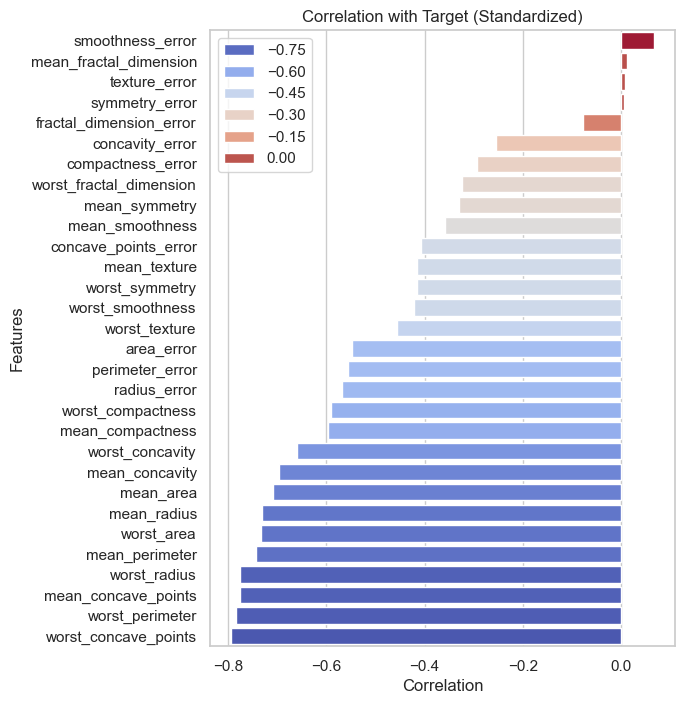

In [33]:
target_corr = df.corr()["target"].drop("target").sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm", hue=target_corr.values)
plt.title("Correlation with Target (Standardized)")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

- A negative correlation indicates that as the feature value increases, the tumor is more likely to be malignant.
- A positive correlation indicates that as the feature value increases, the tumor is more likely to be benign.
- A correlation close to 0 suggests there is little to no linear relationship between the feature and the target.

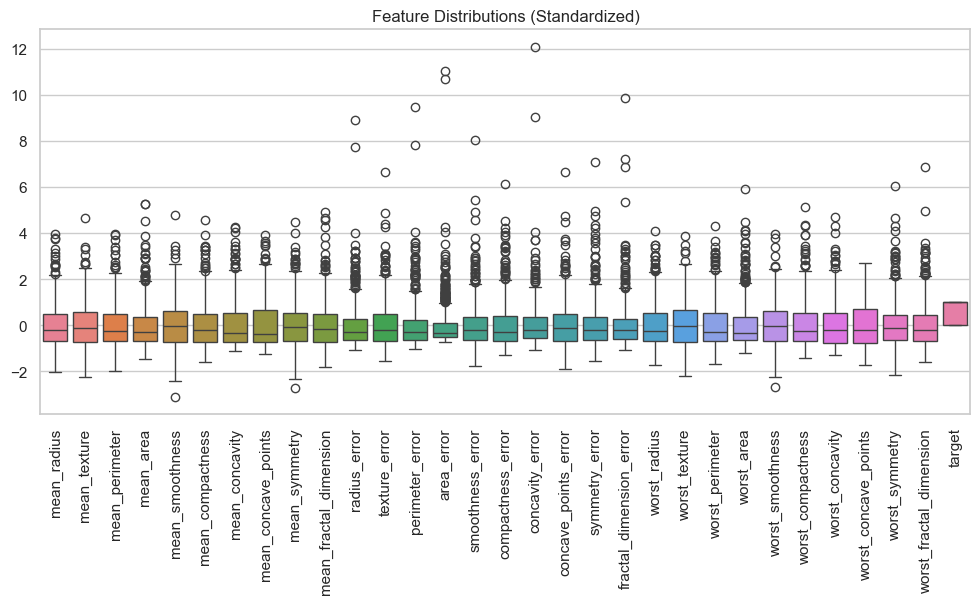

In [34]:
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns="target")), columns=df.columns[:-1])
df_scaled["target"] = df["target"].values

plt.figure(figsize=(12,5))
sns.boxplot(data=df_scaled)
plt.title("Feature Distributions (Standardized)")
plt.xticks(rotation=90)
plt.show()

# Three-way Split (Train / Validation / Test)

When building a machine learning model, it is common to split the dataset into three parts:
- **Training Set**: Used to train the model.
- **Validation Set**: Used to tune hyperparameters and make decisions about the model architecture.
- **Test Set**: Used only after the model is fully trained and tuned, to evaluate its final performance and robustness on unseen data.

It is important as it avoids overfitting to validation data, provides feedback on which hyperparameters work best, and gives an unbiased estimate of model performance on new data.

In [36]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(341, 30) (114, 30) (114, 30)
